In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import *

In [3]:
pima = pd.read_csv('diabetes.csv')
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
pima.isna().sum().sum()

0

In [7]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = \
pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0 , np.nan)

In [9]:
pima.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
for i , c in enumerate(pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']])  :
    pima[c].fillna(pima[c].mean() , inplace=True)

In [11]:
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
plt.style.use('bmh')

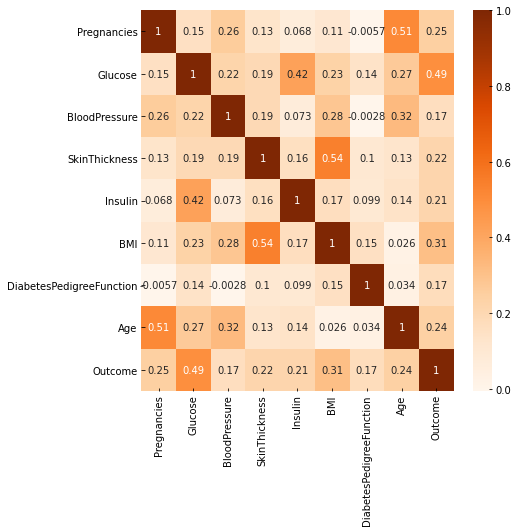

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(pima.corr() , annot=True , cmap='Oranges');

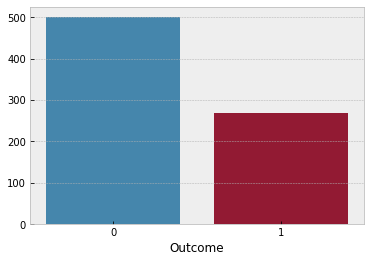

In [14]:
sns.countplot(pima['Outcome'])
plt.ylabel('');

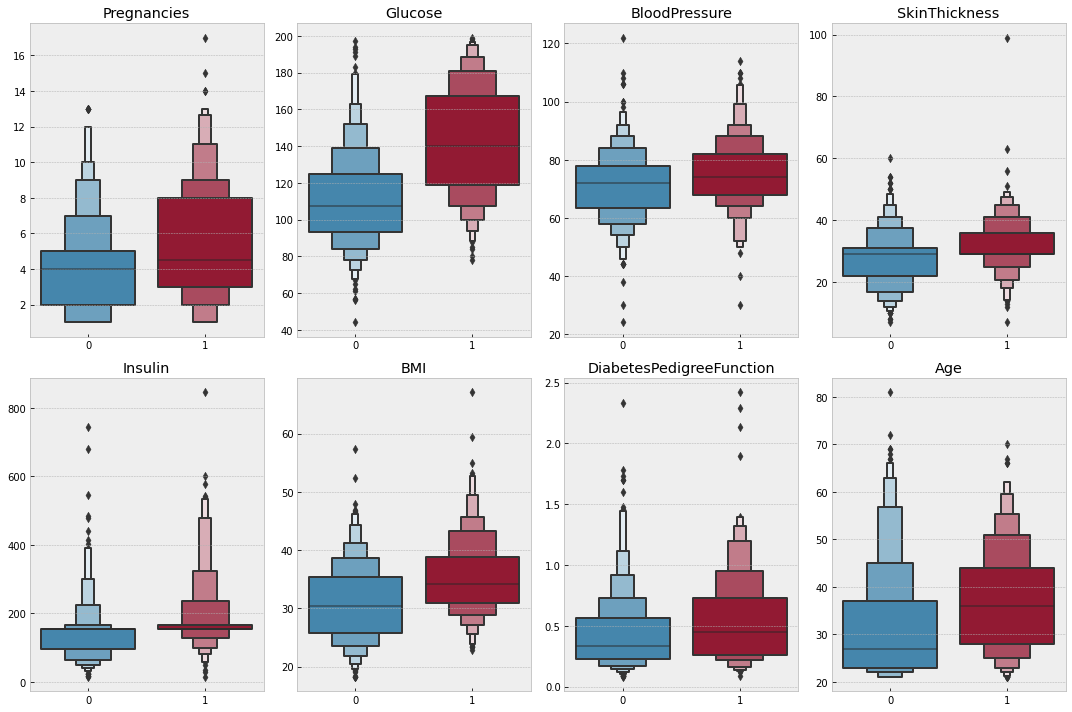

In [15]:
fig , ax = plt.subplots(2,4 , figsize=(15,10))
ax = ax.ravel()

for i , c in enumerate(pima.drop('Outcome' , axis=1)) :
    sns.boxenplot(data=pima , x='Outcome', y=c , ax=ax[i] )
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(c)
plt.tight_layout()

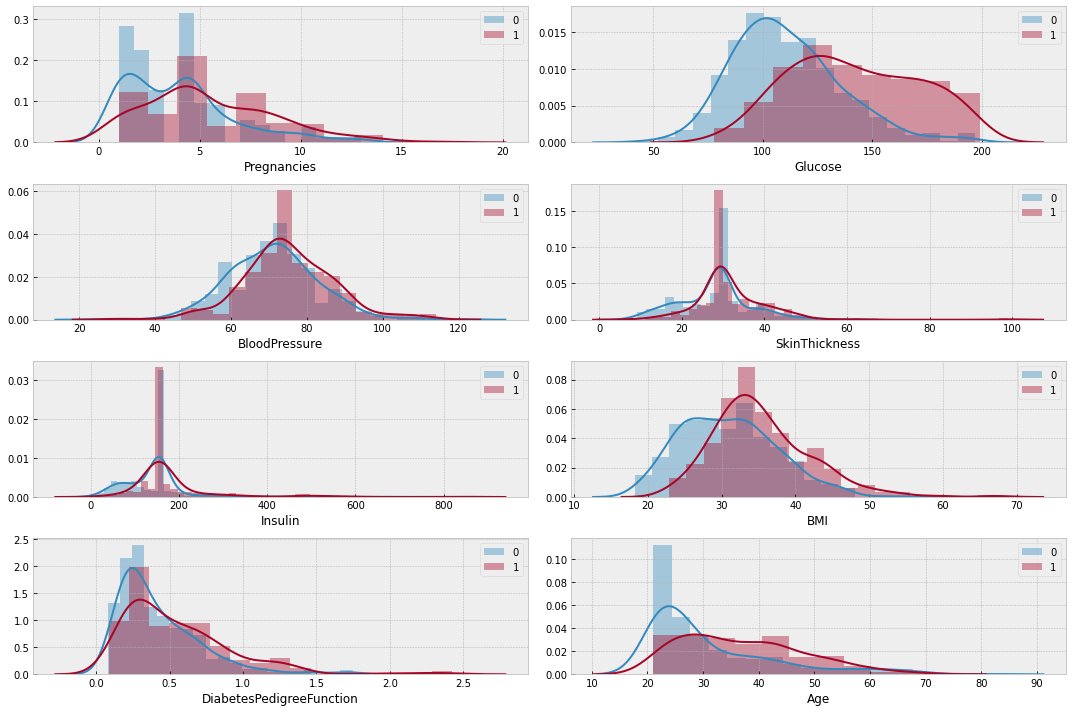

In [16]:
fig , ax = plt.subplots(4,2 , figsize=(15,10))
ax = ax.ravel()

for i , c in enumerate(pima.drop('Outcome' , axis=1)) :
    sns.distplot(pima[pima['Outcome']==0][c] , ax=ax[i] , label='0')
    sns.distplot(pima[pima['Outcome']==1][c] , ax=ax[i] , label='1')
    ax[i].set_ylabel('')
    ax[i].legend()
    
plt.tight_layout()

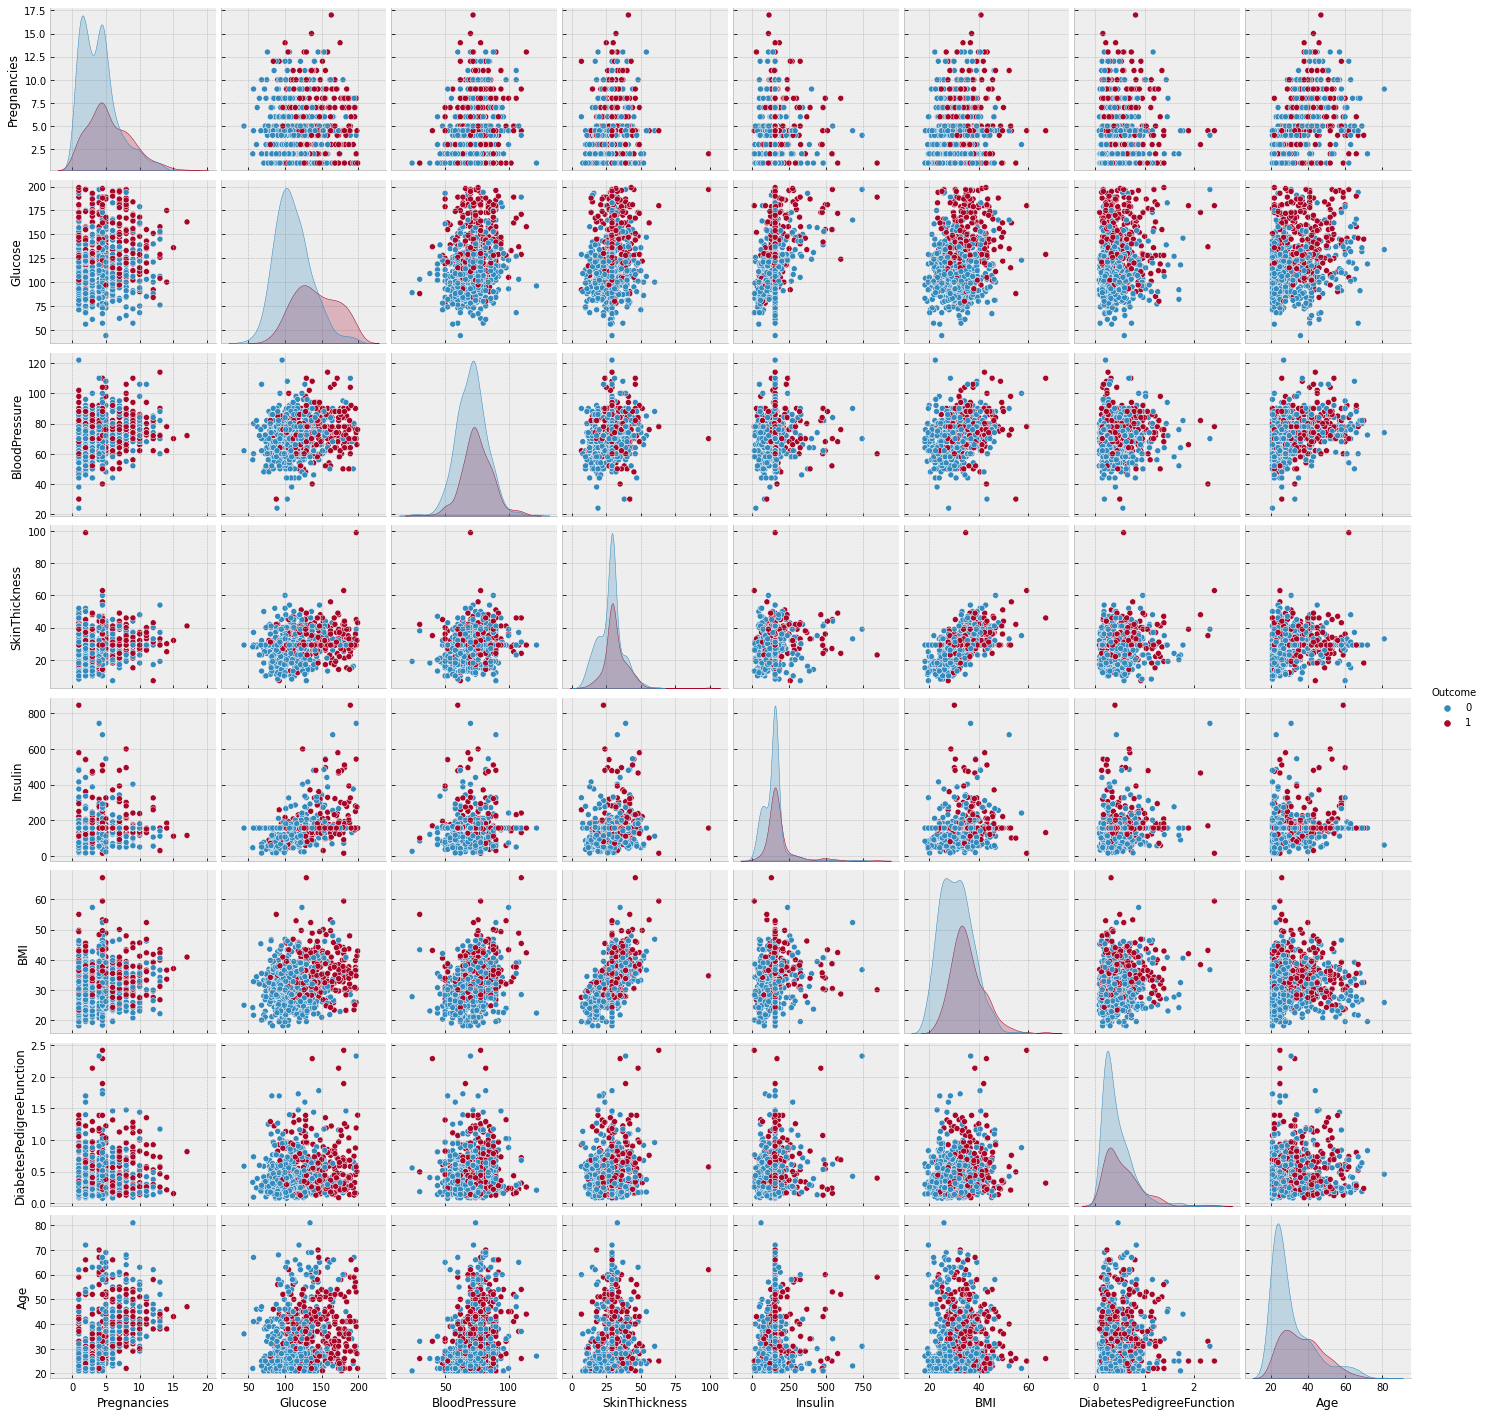

In [17]:
sns.pairplot(data=pima , hue='Outcome');

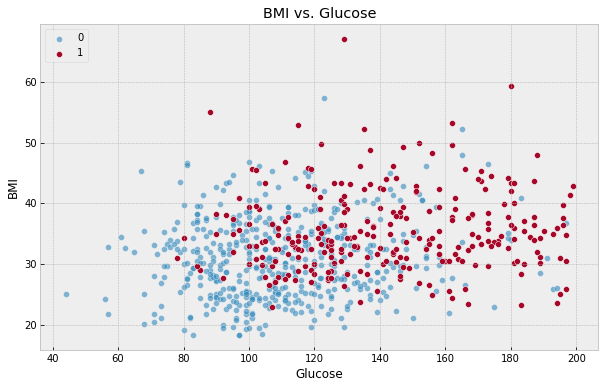

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pima[pima['Outcome']==0] , y='BMI' , x='Glucose', alpha=0.6 , label='0')
sns.scatterplot(data=pima[pima['Outcome']==1] , y='BMI' , x='Glucose', label='1')
plt.title('BMI vs. Glucose')
plt.legend(loc='upper left');

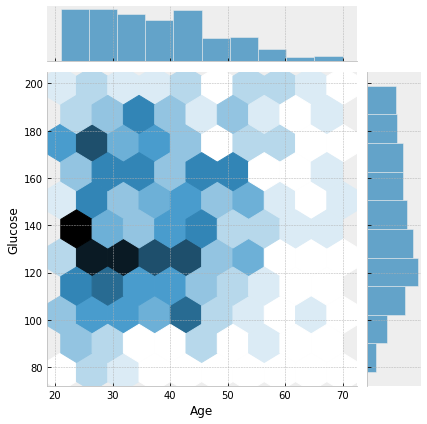

In [19]:
sns.jointplot(data=pima[pima['Outcome']==1] , x='Age' , y='Glucose' , kind='hex');

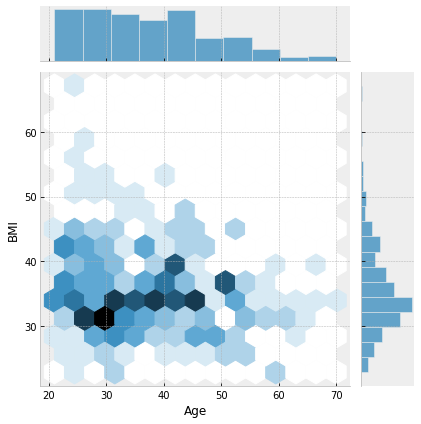

In [20]:
sns.jointplot(data=pima[pima['Outcome']==1] , x='Age' , y='BMI' , kind='hex');

# Prediction

In [21]:
features = pima.drop('Outcome' , axis=1)
target = pima['Outcome']

In [22]:
scaler = StandardScaler()

In [23]:
x_train , x_test , y_train , y_test = train_test_split(features , target , train_size=0.8 
                                                       , random_state=45 , shuffle=True , stratify=target)

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [25]:
rank = []

In [26]:
def prediction(algor):

    algor.fit(x_train , y_train)
    y_pred = algor.predict(x_test)
    
    print(f"------ {str(algor).replace('()','')} ------\n")
    print(classification_report(y_test , y_pred))
    print(f'Accuracy Score = {accuracy_score(y_test , y_pred)}\n')
    print(confusion_matrix(y_test , y_pred))
    
    return rank.append([str(algor).replace('()','') , accuracy_score(y_test , y_pred)*100])

In [27]:
prediction(LogisticRegression())

------ LogisticRegression ------

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.79      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154

Accuracy Score = 0.7922077922077922

[[92  8]
 [24 30]]


In [28]:
prediction(KNeighborsClassifier())

------ KNeighborsClassifier ------

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154

Accuracy Score = 0.7272727272727273

[[82 18]
 [24 30]]


In [29]:
prediction(DecisionTreeClassifier())

------ DecisionTreeClassifier ------

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       100
           1       0.57      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Accuracy Score = 0.7077922077922078

[[73 27]
 [18 36]]


In [30]:
prediction(GaussianNB())

------ GaussianNB ------

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154

Accuracy Score = 0.7792207792207793

[[86 14]
 [20 34]]


In [31]:
prediction(SVC())

------ SVC ------

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

Accuracy Score = 0.7662337662337663

[[84 16]
 [20 34]]


In [32]:
prediction(GradientBoostingClassifier())

------ GradientBoostingClassifier ------

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Accuracy Score = 0.7597402597402597

[[84 16]
 [21 33]]


In [33]:
prediction(SGDClassifier())

------ SGDClassifier ------

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.64      0.67      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy Score = 0.7532467532467533

[[80 20]
 [18 36]]


In [34]:
model_rank = pd.DataFrame(rank , columns=['Model' , 'Score']).sort_values('Score' , ascending=False)

In [35]:
model_rank

,Model,Score
0,LogisticRegression,79.220779
3,GaussianNB,77.922078
4,SVC,76.623377
5,GradientBoostingClassifier,75.974026
6,SGDClassifier,75.324675
1,KNeighborsClassifier,72.727273
2,DecisionTreeClassifier,70.779221


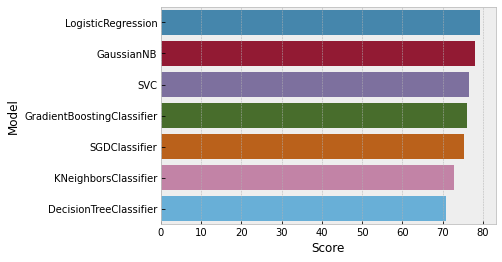

In [36]:
sns.barplot(data=model_rank , y='Model' , x='Score');

### LogisticRegression VS. GaussianNB 

In [37]:
def predict_cv(algor , param):
        
    model = GridSearchCV(algor , param_grid=param , cv=5)
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    tpr , fpr , th = roc_curve(y_test , y_pred_proba)
    
    print(f"--- {str(algor).replace('()' , '')} ---")
    print(f'Best Parameter = {model.best_params_}')
    print(f'Best Score = {model.best_score_}\n')
    print(classification_report(y_test , y_pred))
    
    fig , ax = plt.subplots(1,2 , figsize=(10,4))
    sns.heatmap(confusion_matrix(y_test , y_pred) ,annot=True , fmt='.0f',cmap='Reds',cbar=False,linewidths=1, ax=ax[0])
    ax[0].set_xlabel('Prediction')
    ax[0].set_ylabel('Actually')
    ax[0].set_title(str(algor).replace('()' , ''))
    
    ax[1].plot([0,1] , [0,1] , '--')
    ax[1].plot(tpr , fpr , label=f'AUC={roc_auc_score(y_test , y_pred_proba).round(4)}')
    ax[1].set_title('ROC curve')
    ax[1].legend(loc='lower right')
    

--- LogisticRegression ---
Best Parameter = {'C': 1.0}
Best Score = 0.7703585232573638

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.79      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



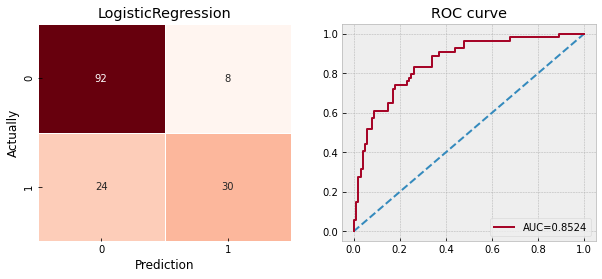

In [38]:
predict_cv(LogisticRegression() , dict(C=np.logspace(-5,5,11)))

--- GaussianNB ---
Best Parameter = {'var_smoothing': 0.1}
Best Score = 0.7508863121418099

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



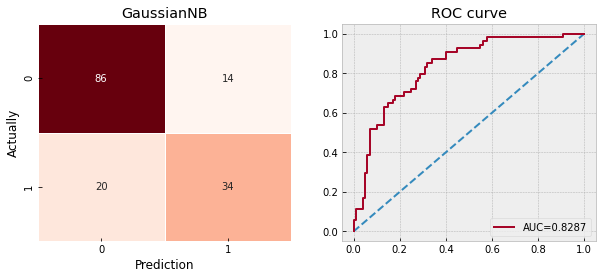

In [39]:
predict_cv(GaussianNB() , dict(var_smoothing=np.logspace(0,-9,10)))